# Visión computacional basada en redes neuronales artificiales

# Unidad 1: Introducción a la visión computacional
## Clase 3: PyTorch

IMPORTANTE! Este Colab depende del Colab de la clase 2. Es decir, **necesitás haber corrido el Colab de la clase anterior de punta a punta para que no falle este**.

### 1. Configuración del ambiente

Antes de empezar a trabajar, necesitamos preparar algunas cosas del ambiente de trabajo. Inicialmente lo que haremos será:

* Montar Google Drive para guardar allí los archivos que descarguemos. En la consola nos va a aparecer una solicitud para hacer clic en una URL, loggearnos con nuestra cuenta de Google y colocar un código de autorización en una casilla.
* Crear la carpeta destino para los archivos que vayamos descargando.

In [13]:
# instalamos el paquete para descargar archivos
#!pip install wget

# importamos librerias
import matplotlib.pyplot as plt
from os import path

# data folder
datasets_folder = 'datos/'

# establecemos la ruta donde guardaremos el archivo del perro
dog_filename = path.join(datasets_folder, 'dog.png')
# y donde guardaremos las imágenes de los gatos
cats_path = path.join(datasets_folder, 'image-cats')

### 2. Verificando la disponibilidad de PyTorch y torchvision

![](https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png)

A lo largo de este curso utilizaremos [PyTorch](https://pytorch.org/) para trabajar, uno de los frameworks para deep learning que más ha crecido en popularidad en el último tiempo. Es una alternativa a otros como TensorFlow o Keras, más imperativa que declarativa, y por ende mucho más "developer-friendly".

En esta primera clase nos dedicaremos a entender un poco de su sintaxis, pero en las clases sucesivas veremos cómo entrenar modelos y cosas más interesantes.

Lo primero que haremos ahora será importar PyTorch (que ya viene instalado en Google Colab) y ver qué versión tenemos. Por defecto, la versión que viene acá trae soporte para utilizar una GPU. Si uds necesitan instalar nativo PyTorch en sus computadoras (por ejemplo, porque tienen una GPU propia con mucha memoria y quieren aprovecharla para hacer experimentos), sigan las instrucciones provistas en [el sitio oficial de PyTorch](https://pytorch.org/).

In [2]:
# importamos pytorch
import torch

# obtenemos la versión
torch.__version__

'2.8.0'

Vemos que tenemos la ultimísima versión. Vemos, además, el texto "+cu" seguido de un número en el nombre. Esto significa que también contamos con soporte para correr los algoritmos en GPUs de NVIDIA, utilizando CUDA (por eso "+cu"). CUDA es el framework de NVIDIA para hacer operaciones en GPU, indispensable cuando trabajamos en deep learning. Las GPUs nos permite hacer operaciones básicas a gran velocidad y de manera paralela, lo que facilita el entrenamiento de las redes y acota significativamente los tiempos tanto de entrenamiento como de predicción. El número al lado del "+cu" representa el número de versión de CUDA con el que se trabaja.

Colab nos brinda soporte para utilizar una GPU "en la nube". Para habilitarlo, debemos ir a Entorno de ejecución > Cambiar tipo de entorno de ejecución, y en la ventana que se abre elegir, bajo el título  Aceleración de hardware, la opción GPU. Al hacerlo, tendremos que volver a cargar PyTorch, ejecutando la celda de arriba. También podemos elegir TPU, ya que las TPUs son "tensor processing units", primas hermanas de las GPUs dedicadas para el procesamiento de tensores.

Para verificar si la placa gráfica está disponible, y cuántas son las que tenemos, podemos hacer:

In [9]:
# verificamos si está disponible la GPU
print(torch.cuda.is_available())
# y cuántas hay
torch.cuda.device_count()

!uname -m               # debería decir: arm64
!python3 -c "import platform; print(platform.platform(), platform.machine())"
# ... y que machine() sea 'arm64'


False
arm64
macOS-15.6.1-arm64-arm-64bit-Mach-O arm64


Si hicimos las cosas bien al momento de definir el Entorno de ejecución de esta notebook, deberíamos ver que la placa está disponible (```True```) y que tenemos 1.

Ahora bien, ¿cuál es la GPU que tenemos? Podemos ver sus especificaciones ejecutando el comando de bash ```nvidia-smi```. Este mismo comando (sin !) pueden usarlo en una terminal Linux / Mac (y creo que también en Windows, pero nunca lo chequeé) para verificar las especificaciones de la GPU que tengan en su computadora (siempre y cuando sea NVIDIA).

In [4]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


Es siempre una buena práctica chequear que CUDA esté funcionando bien antes de empezar a trabajar. Cuando usen GPUs propias y no trabajen en Colab, esto puede convertirse en un serio dolor de cabeza. Así que ya saben, chequeen eso primero.

Otro dato importante: por ahora ningún framework de deep learning proveé soporte para trabajar con GPUs de ATI (las Radeon, por ejemplo). Y si usás Mac y estás entusiasmado/a/e con usar una eGPU (externa, de esas que se conectan por Thunderbolt o USB-C), sabé que se discontinuó el soporte para estas placas desde hace 2 años: las nuevas versiones de macOS no tienen drivers para trabajar con NVIDIA, así que es como enchufarle una plancha.

Otro paquete relevante para nosotros es Torchvision, también escrito por la gente de PyTorch, y que nos brinda muchísima funcionalidad para trabajar problemas de visión. Chequeemos si está disponible, y su versión:

In [10]:
import torchvision

print(torchvision.__version__)

0.23.0


Si todo esto está disponible, podemos empezar a avanzar!

### 3. Tensores en PyTorch

El tensor es la estructura de datos más utilizada en Pytorch. Sirve para modelar escalares (un tensor de un único valor), vectores (tensor 1D), matrices (tensor 2D) o matrices multidimensionales (+ 2D). Entender cómo trabajar con tensores es indispensable para poder avanzar.

![](https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg)

#### 3.1. Cómo crear tensores

A continuación vamos a ver muchas formas diferentes de crear distintos tensores.

El tensor más simple es el escalar: un número, lisa y llanamente, que puede interpretarse como un tensor de dimensión 0. Crearlo va a ser tan simple como pasarle el número que queremos a la instrucción ```tensor``` de PyTorch. Es lo que vamos a hacer a continuación:

In [14]:
import torch

# creamos un tensor con un único número adentro
t_num = torch.tensor(1.0)
print(t_num)
print(1.0)

tensor(1.)
1.0


Fíjense que usamos "1.0". Esto es porque queremos decirle a Python que necesitamos un tensor que tenga un ```float``` adentro. Podemos chequear su tipo pidiéndole el atributo ```dtype``` (tipo de dato) al tensor:

In [15]:
# imprimimos su tipo de dato
print(t_num.dtype)
type(1.0)

torch.float32


float

¿Qué pasa si quisiéramos un tensor con más de un solo número, por ejemplo si trabajamos con un arreglo? Bueno, es tan simple como pasárselo a PyTorch como una lista:

In [16]:
# creamos un tensor que representa un vector
t_vector = torch.tensor([1., 2., 3., 4.])
print(t_vector)

tensor([1., 2., 3., 4.])


¿Y si quisiéramos una matriz? Lo mismo, necesitamos pasar en este caso una lista de listas:

In [17]:
# creamos un tensor que representa una matriz
t_matrix = torch.tensor([[5, 6], [7, 8], [9, 10]])
print(t_matrix)

# imprimimos su tipo de dato
print(t_matrix.dtype)

tensor([[ 5,  6],
        [ 7,  8],
        [ 9, 10]])
torch.int64


Fíjense que tenemos que irle pasando fila por fila, en este caso, para armar la matriz. Además, otro detalle es que como omitimos agregar el decimal "X.0", la matriz que creamos no tiene ```float32``` adentro si no ```int64``` (enteros de 64 bits).

Se imaginarán que llenar matrices a mano es una de las cosas más aburridas del mundo, especialmente si lo que necesitamos es que tenga todos los números iguales. Bueno, hay formas de evitarlo. A continuación vamos a declarar un tensor de 2x2 formado únicamente por unos. Vamos también a imprimir el tipo de dato del tensor, ya que estamos, para conocer por defecto en qué tipo se crean:

In [18]:
# definimos un tensor de 2x2 formado por unos
x = torch.ones(2,2)
print(x)

# imprimimos su tipo de dato
print(x.dtype)

tensor([[1., 1.],
        [1., 1.]])
torch.float32


Vemos que por defecto PyTorch usa floats de 32 bits si no le indicamos el tipo que queremos. Si no necesitamos precisión, podemos declarar tranquilamente un tensor de otro tipo de dato más barato, como el ```uint8``` (solamente 8 bits).

In [19]:
# definimos un tensor de 2x2 formado por unos, pero esta vez en uint8
x = torch.ones(2,2, dtype=torch.uint8)

# lo imprimimos
print(x)

# imprimimos su tipo de dato
print(x.dtype)

tensor([[1, 1],
        [1, 1]], dtype=torch.uint8)
torch.uint8


Fíjense que ahora ya no vemos el punto decimal, si no que vemos solamente el número. Los ```uint8```, al tener 8 bits, pueden tomar valores entero sin signo entre 0 y 255. Como las imágenes!

Podríamos cambiarle el tipo de dato, si quisiéramos, para volver a usar float32 como antes. La belleza de los tipos dinámicos:

In [22]:
# cambiamos el tipo de dato
x = x.type(torch.float)
# lo imprimimos
print(x.dtype)

torch.float32


Así como creamos un tensor de unos, podemos crear un tensor de ceros usando ```zeros```. Si quisiéramos otro número, basta con multiplicar a un tensor de unos por ese valor que queremos. Y si quisiéramos un tensor de valores aleatorios, podemos hacer:

In [23]:
t_random = torch.rand(3,2)
print(t_random)

tensor([[0.7715, 0.4955],
        [0.3438, 0.5753],
        [0.7101, 0.8113]])


En todos los casos, podemos acceder a un componente del tensor simplemente indicando los índices correspondientes:

In [24]:
print(t_random[0])
print(t_random[1])

tensor([0.7715, 0.4955])
tensor([0.3438, 0.5753])


Más adelante vamos a ver formas más copadas de indexar tensores.

#### 3.2. Compatibilidad entre NumPy y PyTorch

De lo más copado (y peligroso) que tiene PyTorch es que podemos ir y volver a NumPy con bastante libertad. Tengan en cuenta que al ir de Tensor a ```numpy arrays``` perdemos el famoso computational graph que vieron en el curso #4, y por ende se nos rompe cualquier red neuronal que definamos en ese caso. Así que si estamos tocando rutinas que involucren al proceso de entrenamiento de una red, eviten salir de PyTorch para irse a NumPy!

Generemos un tensor de números aleatorios y mapeémoslo a un NumPy array:

In [25]:
# definimos el tensor de 2x2 de números aleatorios
x = torch.rand(2,2)
print(x)
print(x.dtype)

# y ahora lo convertimos a numpy
y = x.numpy()
print(y)
print(y.dtype)

tensor([[0.4619, 0.5713],
        [0.1851, 0.6829]])
torch.float32
[[0.4619307 0.5712891]
 [0.1850546 0.6829233]]
float32


Vemos que los creadores de PyTorch hicieron especial énfasis en darle compatibilidad a los tipos de datos de NumPy y de torch. Eso es bueno.

Así como fuimos del tensor a NumPy, podemos hacerlo al revés. Esto es re importante por ejemplo cuando estamos trabajando con imágenes, a las que leeremos como matrices NumPy y luego las transformaremos a tensores.

Generemos una matriz de ceros en NumPy, y hagamos un tensor a partir de ella.

In [26]:
# importamos numpy
import numpy as np

# definimos una matriz de numpy
x = np.zeros((2,2), dtype=np.float32)
print(x)
print(x.dtype)

# convertimos el arreglo en un tensor de Pytorch
y = torch.from_numpy(x)
print(y)
print(y.dtype)

[[0. 0.]
 [0. 0.]]
float32
tensor([[0., 0.],
        [0., 0.]])
torch.float32


Podríamos también usar la imagen de Pomelo con la que estábamos trabajando, y trabajarla como un tensor:

In [29]:
from PIL import Image

im = Image.open(dog_filename)
print(type(im))
im_np = np.asarray(im)
print(type(im_np))

# tomamos la imagen numpy y la convertimos en un tensor
im_tensor = torch.tensor(im_np)

# la imprimimos
print(im_tensor)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
tensor([[[ 18,  50,   9],
         [ 19,  51,  10],
         [ 22,  55,  12],
         ...,
         [ 54,  90,  28],
         [ 56,  92,  30],
         [ 58,  94,  32]],

        [[ 16,  48,   7],
         [ 17,  49,   8],
         [ 20,  53,  10],
         ...,
         [ 52,  88,  26],
         [ 54,  90,  28],
         [ 56,  92,  30]],

        [[ 14,  44,   6],
         [ 15,  46,   5],
         [ 18,  49,   7],
         ...,
         [ 50,  86,  24],
         [ 51,  87,  25],
         [ 53,  89,  27]],

        ...,

        [[181, 186, 104],
         [190, 198, 112],
         [199, 208, 115],
         ...,
         [211, 234, 130],
         [207, 228, 125],
         [176, 197,  94]],

        [[200, 205, 123],
         [204, 212, 126],
         [208, 217, 124],
         ...,
         [188, 211, 107],
         [200, 221, 118],
         [179, 200,  97]],

        [[220, 225, 143],
         [220, 228, 142],
      

Noten que el tipo de dato que utilizamos en este caso es compatible con el uint8 que veníamos usando en la matriz de numpy original.

NOTA: No intenten imprimir este tensor con matplotlib, porque no se puede. Tendríamos que primero volverlo a Numpy, y recién ahí mostrarlo.

#### 3.3. Estudiar el tamaño de un tensor

Si queremos saber el tamaño de un tensor, podemos usar el atributo ```shape``` o el método ```size```. Noten a continuación las diferencias con Numpy (para no equivocarse!)

In [30]:
print(im_np.shape) # esto nos devuelve el tamaño de la matriz
print(im_tensor.shape) # esto nos devuelve el tamaño del tensor

print(im_np.size) # esto nos devuelve la cantidad de valores de la matriz
print(im_tensor.size) # esto está mal! nos devuelve el método, no el valor
print(im_tensor.size()) # esto es igual a pedir shape

(740, 700, 3)
torch.Size([740, 700, 3])
1554000
<built-in method size of Tensor object at 0x122783c00>
torch.Size([740, 700, 3])


Si se comen los paréntesis al usar el ```size()```, el tensor les va a devolver un puntero al método ```size()``` que les va a servir para muy poco. El tamaño se lo pedimos con ```shape``` (ojo con versiones anteriores de PyTorch, donde esto no está implementado) o con ```size()```.

#### 3.4. Indexar tensores

Podemos indexar tensores usando los mismos criterios que veníamos usando siempre en Numpy. Vamos a ver algunos ejemplos.

Antes vimos que el tensor que leimos originalmente era una matriz de 702 x 690 x 4, ya que en la tercera dimensión no solamente tenemos los valores de rojo, verde y azul, si no también los de transparencia. Podemos eliminar esos valores de transparencia bien fácil, usando **indexado por rangos**, indicando la coordenada de inicio y la de fin. Tengan en cuenta que la de fin no se incluye (entonces, si queremos las 3 primeras coordenadas, tenemos que pasar el rango del 0 al 3).

In [31]:
print(im_tensor.shape)
im_tensor = im_tensor[:,:,0:3]
print(im_tensor.shape)

torch.Size([740, 700, 3])
torch.Size([740, 700, 3])


Supongamos que queremos obtener todos los valores de verde de la imagen ```im_tensor``` para la fila 30 de la imagen. En la primera coordenada (la de la fila) indicaremos la posición 29 del tensor, en la segunda el símbolo ```:``` (que indica que queremos todas las columnas), y en la tercera un 1, que es la banda de color que nos interesa.

In [32]:
green_row = im_tensor[29,:,1]
print(green_row.shape)
print(green_row)

torch.Size([700])
tensor([ 73,  73,  75,  75,  74,  72,  70,  68,  68,  66,  65,  64,  67,  72,
         77,  80,  87,  88,  86,  83,  75,  65,  56,  50,  46,  46,  46,  45,
         44,  45,  48,  50,  47,  44,  39,  35,  30,  27,  25,  24,  23,  22,
         21,  20,  20,  21,  23,  24,  32,  34,  37,  39,  40,  42,  46,  48,
         56,  60,  65,  69,  71,  70,  69,  67,  67,  65,  63,  62,  62,  63,
         64,  63,  59,  58,  56,  54,  51,  48,  46,  45,  58,  58,  59,  62,
         65,  66,  66,  65,  61,  59,  57,  54,  50,  47,  44,  44,  41,  42,
         43,  47,  52,  58,  61,  63,  64,  62,  61,  64,  67,  71,  74,  75,
         76,  77,  76,  74,  73,  72,  70,  69,  73,  73,  70,  68,  65,  64,
         66,  67,  62,  62,  62,  63,  65,  68,  70,  72,  80,  81,  81,  80,
         78,  73,  68,  66,  67,  68,  68,  67,  65,  64,  63,  63,  65,  65,
         64,  63,  60,  59,  58,  57,  61,  65,  72,  79,  85,  88,  88,  86,
         86,  86,  88,  90,  92,  92,  88,  86

Si quisiéramos obtener un cuadrado de la imagen original, podemos hacerlo también gracias al indexado por rangos. En este caso, por ejemplo, obtenemos un cuadrado de 200 x 200 píxeles ubicado en el margen superior izquierdo de la imagen. De paso les mostramos cómo visualizarlo.

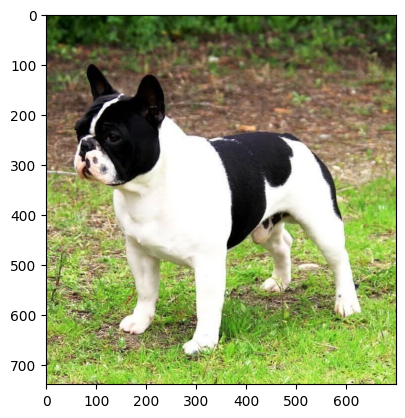

torch.Size([200, 200, 3])


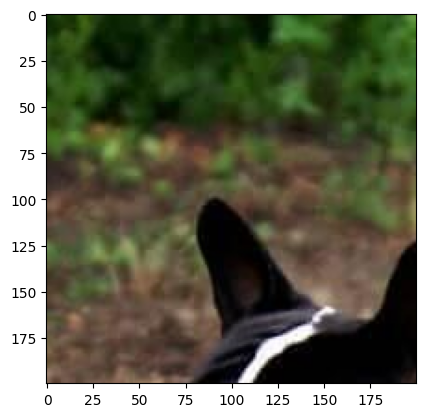

In [33]:
import matplotlib.pyplot as plt

plt.imshow(im_tensor)
plt.show()

square = im_tensor[:200,:200,:]
print(square.shape)

plt.imshow(square)
plt.show()

#### 3.5. Asignar nombres a las dimensiones de un tensor

Las últimas versiones de PyTorch (desde 1.3) traen una feature muy copada, los [**tensores con nombre** o *named tensors*](https://pytorch.org/docs/stable/named_tensor.html). Básicamente, nos permiten ponerle un nombre a cada una de las dimensiones de un tensor, así podemos hacer que nuestros códigos operen sobre la dimensión adecuada independientemente de dónde se encuentre.

Un ejemplo. Hasta ahora, la imagen con la que trabajamos tiene las componentes RGB en la dimensión 2. Sin embargo, vamos a ver en las clases sucesivas que en general los tensores de entrada de una red neuronal tienen 4 dimensiones de la forma ```tamaño de batch x RGB x alto x ancho```. Es decir, en lugar de tener las componentes de color en la dimensión 2, están en la 1. Si en cualquiera de los dos tensores nombramos a esa dimensión con ```channel```, por ejemplo, podríamos hacer operaciones en esa dimensión sin problemas.

In [34]:
# agregamos nombres a las dimensiones de la imagen
im_tensor = im_tensor.refine_names(..., 'rows', 'columns', 'channels')
print('im_tensor:', im_tensor.shape, im_tensor.names)

im_tensor: torch.Size([740, 700, 3]) ('rows', 'columns', 'channels')


/Users/joaquintschopp/proyectos_maestria/VC-ARN/.venv/lib/python3.13/site-packages/torch/_tensor.py:1366: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/c10/core/TensorImpl.h:1942.)
  return super().refine_names(names)


Podríamos hacerlo también desde 0, al crear el vector. En este caso crearemos un tensor aleatorio similar al que usaríamos como entrada para una red neuronal.

In [35]:
random_batch = torch.rand(64, im_tensor.shape[2], im_tensor.shape[0], im_tensor.shape[1], names=['batch_size', 'channels', 'rows', 'columns'])
print('random_batch:', random_batch.shape, random_batch.names)

random_batch: torch.Size([64, 3, 740, 700]) ('batch_size', 'channels', 'rows', 'columns')


#### 3.6. Operaciones con tensores

PyTorch nos provee montones de operaciones para hacer con tensores, y es de gusto listarlas a todas acá. En la [documentación online de PyTorch](http://pytorch.org/docs) van a encontrarla completa (úsenla, todo está ahí o en los foros de PyTorch!).

Las operaciones con tensores están disponibles directamente como funciones dentro del módulo ```torch``` o como métodos de la clase ```Tensor```. Veamos el ejemplo de la función ```transpose```:

In [36]:
# declaramos un tensor A
A = torch.ones(3, 2)

# lo trasponemos usando funciones de PyTorch
A_t = torch.transpose(A, 0, 1)
print(A.shape, A_t.shape)

# lo trasponemos usando el método de A
A_t = A.transpose(0, 1)
print(A.shape, A_t.shape)

torch.Size([3, 2]) torch.Size([2, 3])
torch.Size([3, 2]) torch.Size([2, 3])


También tenemos operaciones inline, que se indican con el guión bajo. Esas operaciones aplican directamente sobre el tensor que la invoca, y no devuelven nada. Por ejemplo:

In [37]:
print(A.shape)
result = A.transpose_(0,1)
print(A.shape)
print(result)

torch.Size([3, 2])
torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


#### 3.7. Mover tensores entre dispositivos

Por defecto, cualquier tensor que nosotros declaremos va a vivir en la memoria RAM principal ("de la CPU"), y no en la de la GPU. Podemos ir y volver entre un dispositivo de otro, aunque con cierto overhead temporal (es costoso ir de un lado al otro!).

Chequeemos por defecto dónde está el tensor que declararemos a continuación

In [38]:
# definimos un tensor
x = torch.tensor([0.5, 1.5])
print(x)
# imprimimos el dispositivo donde está
print(x.device)

tensor([0.5000, 1.5000])
cpu


Y ahora movámoslo a la memoria RAM de la GPU. Para ello definimos un objeto de tipo ```torch.device()``` que modele la placa, y usamos el método ```to()``` de la clase tensor.

In [40]:
# definimos un objeto device para la gpu
device = torch.device("mps")
# movemos el tensor
x = x.to(device)
print(x)
print(x.device)

tensor([0.5000, 1.5000], device='mps:0')
mps:0


Y ahora lo llevamos a la RAM de la CPU, de la misma manera que lo hicimos antes:

In [41]:
# definimos un objeto device para la cpu
device = torch.device("cpu")
# movemos el tensor
x = x.to(device)
print(x)
print(x.device)

tensor([0.5000, 1.5000])
cpu


Otra forma más sencilla es simplemente usar los métodos ```.cuda()``` y ```.cpu()```. Tengan en cuenta que si tienen más de una GPU "CUDA-capable", no tienen control sobre a cuál placa están mandando el tensor.

In [42]:
# movemos a la GPU de nuevo
x = x.cuda()
print(x.device)
# y ooootra vez a la CPU
x = x.cpu()
print(x.device)

AssertionError: Torch not compiled with CUDA enabled

¿Qué pasa si hacemos operaciones con tensores en uno u otro dispositivo?
Por defecto, todos los tensores con los que operemos en una sentencia deben estar dentro del mismo dipositivo: o sea que si intentamos multiplicar un tensor en GPU por uno que está en CPU, la operación va a fallar. Si ambos viven en el mismo dispositivo, el resultado vivirá en ese mismo dispositivo (no se trae a la CPU). Veamos un ejemplo:

In [ ]:
x_gpu = x.cuda() * 2
print(x_gpu.device)

cuda:0


Cuando operamos con escalares y tensores, los escalares "se mueven solos" al dispositivo en el que están los tensores.

### 5. PyTorch: trabajar con imágenes

Todos los datos con los que trabajamos en PyTorch deben ser tensores. En este curso de visión computacional, los datos son imágenes, y por ende tenemos que ver cómo trabajarlas como tensores.

Ya vimos cómo leer imágenes de disco, ponerlas en arreglos NumPy y mapearlas a tensores. Vimos también que, por defecto, en NumPy nos quedan las componentes de color en la 3era dimensión. En PyTorch se asume que cualquier tensor que se meta en una red neuronal será de dimensions $N \times C \times H \times W$, donde $N$ es el número de imágenes en un batch, $C$ el número de canales de color, $H$ la altura de la imagen y $W$ el ancho. A continuación veremos un código que nos carga la imagen de Pomelo usando ```imageio```, crea un tensor y le cambia el *layout* para que coincida con lo que nos gusta usar en PyTorch.

In [45]:
import imageio

# leemos la imagen usando imageio
img_arr = imageio.imread(dog_filename)
# le sacamos la dimensión de la opacidad
img_arr = img_arr[:,:,0:3]
# imprimimos su tamaño
print(img_arr.shape)

# creamos el tensor
img = torch.from_numpy(img_arr)
print(img.shape)
out = img.permute(2, 0, 1)
print(out.shape)

(740, 700, 3)
torch.Size([740, 700, 3])
torch.Size([3, 740, 700])


/var/folders/66/98ml0k7s50sbjln7zqxcj2y80000gn/T/ipykernel_54422/563200919.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(dog_filename)


Obviamente nos está faltando todavía la dimensión del batch. Un batch es básicamente un "apilado" de imágenes de igual tamaño y profundidad de color. Imaginen algo así como un pan lactal donde cada feta de pan es una imagen, y todas del mismo tamaño y con el mismo espesor.

En el siguiente código de ejemplo vamos a recorrer el directorio donde guardamos las imágenes de los gatos, y vamos a cargar en un batch todas las imágenes PNG que haya en el directorio. El batch tendrá 3 imágenes RGB apiladas, de $256 \times 256$ píxeles

In [50]:
import imageio.v2 as imageio
import os

# Ruta de la carpeta
cats_path = "datos/image-cats/"
filenames = os.listdir(cats_path)

for name in filenames:
    # saltamos si ya es PNG
    if name.lower().endswith(".png"):
        continue

    # leemos la imagen (cualquier formato soportado: jpg, bmp, etc.)
    img = imageio.imread(os.path.join(cats_path, name))

    # armamos nuevo nombre .png
    base, _ = os.path.splitext(name)
    new_name = base + ".png"

    # guardamos como PNG
    imageio.imwrite(os.path.join(cats_path, new_name), img)

print("Conversión a PNG terminada.")


Conversión a PNG terminada.


In [56]:
import os
import torch
import torch.nn.functional as F
import imageio.v2 as imageio


def pad_to_square(t: torch.Tensor, pad_value=0.0):
    # t: CxHxW
    C, H, W = t.shape
    s = max(H, W)
    out = torch.full((C, s, s), pad_value, dtype=t.dtype)
    y0 = (s - H) // 2
    x0 = (s - W) // 2
    out[:, y0:y0+H, x0:x0+W] = t
    return out




cats_path = "datos/image-cats"
filenames = [n for n in os.listdir(cats_path) if n.lower().endswith(".png")]

N = len(filenames)
batch = torch.empty((N, 3, 256, 256), dtype=torch.float32)

for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(cats_path, filename))  # HxWxC o HxW

    # Asegurar 3 canales (RGB)
    if img_arr.ndim == 2:  # grayscale -> 3 canales
        img_arr = np.stack([img_arr]*3, axis=-1)
    elif img_arr.shape[2] == 4:  # RGBA -> descartar alfa
        img_arr = img_arr[:, :, :3]

    # A Tensor CxHxW en float32 [0,1]
    img_t = torch.from_numpy(img_arr).permute(2, 0, 1).float() / 255.0
    # ... dentro del loop, antes del interpolate:
    img_t = pad_to_square(img_t)  # mantiene proporciones con bordes
    img_t = F.interpolate(img_t.unsqueeze(0), size=(256, 256),
                          mode='bilinear', align_corners=False).squeeze(0)

    batch[i] = img_t

print('Batch size:', batch.shape)  # -> (N, 3, 256, 256)

# ... dentro del loop, antes del interpolate:
img_t = pad_to_square(img_t)  # mantiene proporciones con bordes
img_t = F.interpolate(img_t.unsqueeze(0), size=(256, 256),
                      mode='bilinear', align_corners=False).squeeze(0)


Batch size: torch.Size([3, 3, 256, 256])


All files: ['ctas3.png', 'cats2.png', 'cats1.png']
PNG files: ['ctas3.png', 'cats2.png', 'cats1.png']



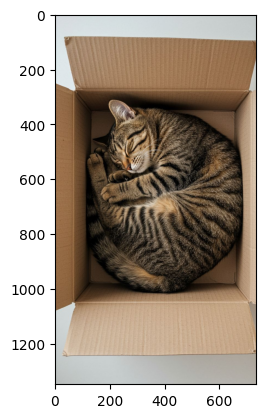

RuntimeError: The expanded size of the tensor (256) must match the existing size (736) at non-singleton dimension 2.  Target sizes: [3, 256, 256].  Tensor sizes: [3, 1349, 736]

In [58]:
# inicializamos un tensor para guardar ahí el batch de 3 x 3 x 256 x 256
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

import os

# armamos una lista de nombres de archivos que terminen en PNG
filenames = [name for name in os.listdir(cats_path)
             if os.path.splitext(name)[-1] == '.png']
print('All files: {}'.format(os.listdir(cats_path)))
print('PNG files: {}'.format(filenames))
print('')
# iteramos por cada archivo de la lista
for i, filename in enumerate(filenames):
  img_arr = imageio.imread(os.path.join(cats_path, filename))
  plt.imshow(img_arr)
  plt.show()
  img_t = torch.from_numpy(img_arr[:,:,0:3]) # otra alternativa para sacar el canal alpha
  img_t = img_t.permute(2, 0, 1)
  #img_t = img_t[:3] # con esto prevenimos cualquier problema con canales alpha
  batch[i] = img_t
print('')
print('Batch size: {}'.format(batch.shape))

### 6. Torchvision: una librería para trabajar con imágenes en PyTorch

PyTorch nos provee por defecto con una librería para procesamiento de imágenes que se llama ```torchvision```. Torchvision tiene montones de funcionalidades que se utilizan normalmente en problemas de visión, con la idea de que no tengamos que reinventar la rueda cada vez que queremos resolver algo nuevo. Así, podemos convertir una imagen a tensor rápidamente con una operación ```ToTensor()```, o cambiar las intensidades de la imagen al azar mediante un ```ColorJitter()```, etc etc. Además, incluye banda de modelos preentrenados sobre grandes volúmenes de imágenes para clasificar, detectar objetos o segmentar, y hasta tiene formas eficientes de que te traigas datasets tradicionales. Es un golazo.

Vamos a ver algunas transformaciones copadas.

#### 6.1. Conversión a tensor

Torchvision trae la clase ```ToTensor()``` que, dado un objeto PIL o una matriz de NumPy, hace la conversión a tensor... pero con algunas cositas más.
Veamos qué pasa cuando la aplicamos.

In [59]:
import numpy as np
from torchvision.transforms import ToTensor

# creamos un objeto de la clase ToTensor()
to_tensor = ToTensor()

# iteramos por cada nombre de archivo
for i, filename in enumerate(filenames):

  # leemos la imagen como una matriz de numpy
  img_arr = imageio.imread(os.path.join(cats_path, filename))
  # y la convertimos en un tensor
  img_tensor = to_tensor(img_arr)

  print("===================")
  print("")
  print(filename)
  print("")

  # imprimimos por pantalla las dimensiones de la matriz antes y despues
  print("Tamaños:")
  print("Antes: \t {}".format(img_arr.shape))
  print("Después: {}".format(img_tensor.size()))
  print("")

  # imprimimos por pantalla la intensidad máxima antes y después
  print("Intensidad máxima")
  print("Antes: \t {}".format(np.max(img_arr)))
  print("Después: {:.4f}".format(torch.max(img_tensor)))
  print("")


ctas3.png

Tamaños:
Antes: 	 (1349, 736, 3)
Después: torch.Size([3, 1349, 736])

Intensidad máxima
Antes: 	 252
Después: 0.9882


cats2.png

Tamaños:
Antes: 	 (1104, 736, 3)
Después: torch.Size([3, 1104, 736])

Intensidad máxima
Antes: 	 255
Después: 1.0000


cats1.png

Tamaños:
Antes: 	 (1350, 1080, 3)
Después: torch.Size([3, 1350, 1080])

Intensidad máxima
Antes: 	 255
Después: 1.0000



Como pueden ver, la conversión a tensor con esta función tuvo doble efecto:
1. Nos desplazó la dimensión de los colores al eje 0, como dijimos en clase que PyTorch espera.
2. Normalizó las intensidades dividiendo por el máximo teórico (255).

Esto nos ahorra tener que ir escribiendo la conversión a tensor, el swap de los ejes y la normalización cada vez que leemos una imagen. Golazo.

#### 6.2. ColorJitter y composición de transformaciones

¿Se acuerdan que en la clase pasada vimos que podemos alterar los colores de las imágenes? Bueno, esto es algo recontra útil para hacer data augmentation cuando entrenamos redes neuronales (chino básico a esta altura, pero en un par de clases van a saber de qué les hablo).

Torchvision nos trae operaciones ya programadas que nos permiten, por ejemplo, alterar determinadas características de la imagen (brillo, contraste, saturación y hue) de forma aleatoria, determinando antes el rango de valores en el que queremos que altere la imagen.

La funcionalidad en cuestión viene implementada en la clase ```ColorJitter```, y para utilizarla tenemos que haber convertido antes a la imagen en tensor. Si queremos aplicar ambas transformaciones de manera secuencial, una después de la otra, podemos usar otra clase de Torchvision, la ```Compose```, que nos permite crear una composición de transformaciones.

Veamos un ejemplo:

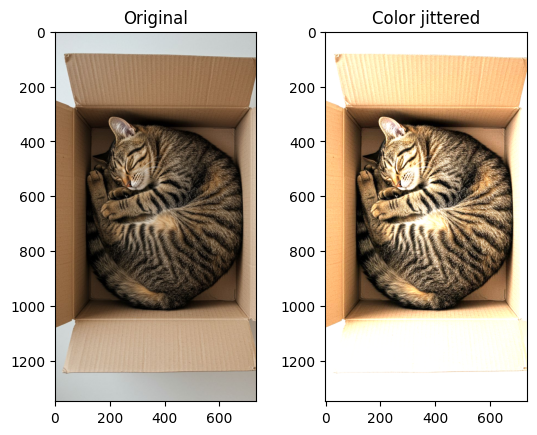

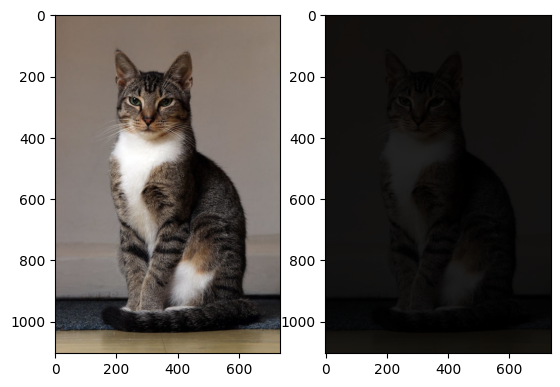

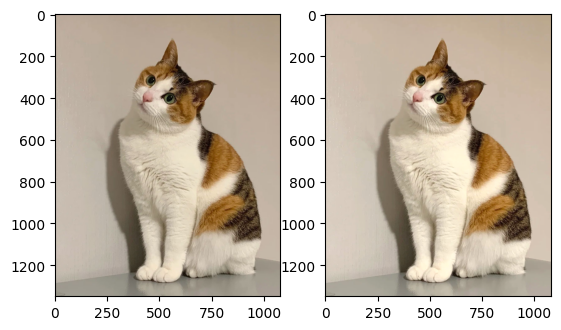

In [62]:
from torchvision.transforms import ColorJitter, Compose

# creo una composición de transformaciones, que incluye la conversión a tensor
# y el color jitter
transformations = Compose([ToTensor(),
                           ColorJitter(brightness=0.9,
                                       contrast=0.0,
                                       saturation=0.0,
                                       hue=0.0)])


# iteramos por cada nombre de archivo
for i, filename in enumerate(filenames):

  # leemos la imagen como una matriz de numpy
  img_arr = imageio.imread(os.path.join(cats_path, filename))
  # convierto la imagen a tensor y aplico los cambios en las intensidades al azar
  img_tensor = transformations(img_arr)

  # los muestro por pantalla
  fig, axes = plt.subplots(1, 2)
  axes[0].imshow(img_arr)
  axes[1].imshow(img_tensor.permute(1,2,0))
  if i == 0:
    axes[0].set_title("Original")
    axes[1].set_title("Color jittered")
  plt.show()


Si tienen ganas de juguetear con las configuraciones, pueden modificar los valores de los parámetros que le pasamos a ```ColorJitter```. Tengan en cuenta que brillo, contraste y saturación recibe valores entre [0.0 y 1.0] (cuanto mayor el número, más "amplio" el rango aleatorio de aplicación) y el hue entre [0, 0.5].

#### 6.3. Transformaciones afines

Hasta ahora vimos transformaciones aplicadas únicamente sobre las intensidades de gris o colores de las imágenes. Existen otras transformaciones que nos permiten, dada una coordenada $(i,j)$, determinar una nueva posición $(i',j')$ a la que llevar la intensidad de gris (o los colores) del píxel original.

Acá vamos a ver un tipo particular de estas transformaciones, las afines. La gente del palo de la matemática seguramente recordará aquellas bellas operaciones en las que usábamos determinadas matrices para "mover" o "rotar" un vector en el espacio. Bueno, son esas.

Las transformaciones afines incluyen:
* Rotaciones (rotations): giramos la imagen un determinado ángulo $\alpha$. Si el ángulo es positivo, la rotación se hace hacia la izquierda; si el ángulo es negativo, va para la derecha.
* Traslaciones (translation): consiste en desplazar la imagen en la dirección de un cierto vector, y una cierta cantidad de píxeles.
* Escalado (zoom-in y zoom-out): achicar o agrandar la imagen. Cuando la imagen queda más pequeña que la original, lo usual es completarla con algún valor (por ejemplo, cero). Cuando la imagen queda más grande que la original, normalmente se la recorta en los bordes.
* Shear (no sé cómo se dice en español): consiste en algo así como "trapezoidear" la imagen, "angulando" los bordes horizontales o verticales una cierta cantidad.

Vamos a ver a continuación cómo aplicarlas de forma aleatoria a los gatitos con los que estamos trabajando:

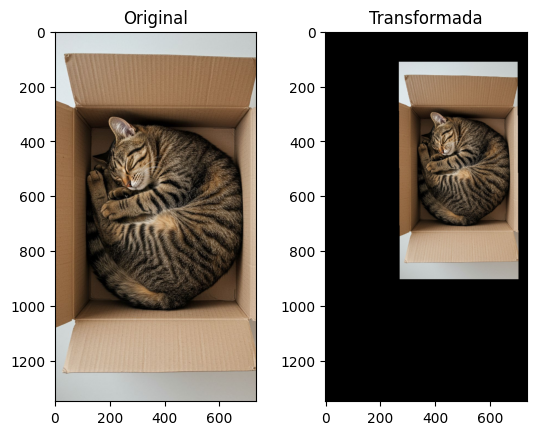

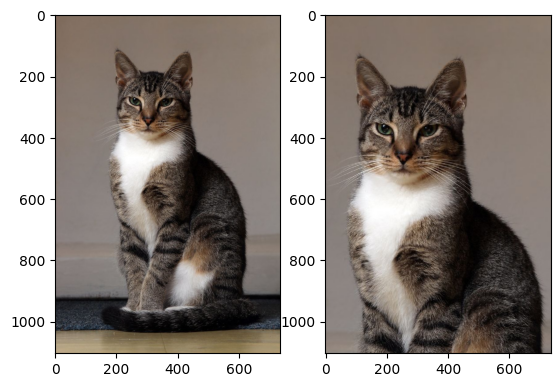

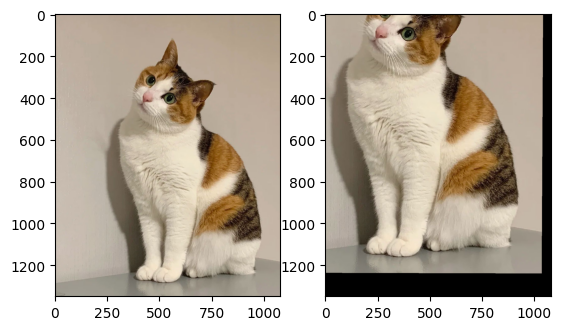

In [68]:
from torchvision.transforms import RandomAffine, Compose

# creo una composición de transformaciones, que incluye la conversión a tensor
# y las transformaciones afines
transformations = Compose([ToTensor(),
                           RandomAffine(degrees=0.2,
                                        translate=(0.2, 0.2),
                                        scale=(0.5, 1.5),
                                        shear=0.5)])

# iteramos por cada nombre de archivo
for i, filename in enumerate(filenames):

  # leemos la imagen como una matriz de numpy
  img_arr = imageio.imread(os.path.join(cats_path, filename))
  # convierto la imagen a tensor y aplico los cambios al azar
  img_tensor = transformations(img_arr)

  # los muestro por pantalla
  fig, axes = plt.subplots(1, 2)
  axes[0].imshow(img_arr)
  axes[1].imshow(img_tensor.permute(1,2,0))
  if i == 0:
    axes[0].set_title("Original")
    axes[1].set_title("Transformada")
  plt.show()

#### 6.4. Hay un montón de transformaciones más!

La idea de estos ejemplos anteriores no era hacer una cobertura exhaustiva de todo lo que le podemos hacer una imagen, si no aprovechar esto como excusa para que vean un poco de torchvision y cómo nos permite interactuar fácilmente con imágenes. Hay montones de otras transformaciones implementadas en esta librería, que les invito a probar para curiosear un poco. Si necesitan por ejemplo hacer una transformación específica de manera *controlada* y *no aleatoria*, lo pueden hacer usando la [versión funcional de las transformaciones](https://pytorch.org/vision/stable/transforms.html#functional-transforms).